In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from collections import defaultdict

In [2]:
class_name = 'Occupancy'
df1 = pd.read_csv('datatraining.txt', skipinitialspace=True, na_values='?', 
                 keep_default_na=True)
df2 =pd.read_csv('datatest.txt', skipinitialspace=True, na_values='?', 
                 keep_default_na=True)
df3=pd.read_csv('datatest2.txt', skipinitialspace=True, na_values='?', 
                 keep_default_na=True)
df4=pd.merge(df1, df2, how='outer')
df=pd.merge(df4, df3, how='outer')
df.shape


(20560, 7)

In [3]:
df['Day']=pd.to_datetime(df['date']).dt.day
df['Hour']=pd.to_datetime(df['date']).dt.hour
df['Month']=pd.to_datetime(df['date']).dt.month
df['Year']=pd.to_datetime(df['date']).dt.year
df['Data']=pd.to_datetime(df['date']).dt.normalize()
del df['date']
df.head()

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy,Day,Hour,Month,Year,Data
0,23.18,27.2720,426.0,721.25,0.004793,1,4,17,2,2015,2015-02-04
1,23.15,27.2675,429.5,714.00,0.004783,1,4,17,2,2015,2015-02-04
2,23.15,27.2450,426.0,713.50,0.004779,1,4,17,2,2015,2015-02-04
3,23.15,27.2000,426.0,708.25,0.004772,1,4,17,2,2015,2015-02-04
4,23.10,27.2000,426.0,704.50,0.004757,1,4,17,2,2015,2015-02-04


In [4]:
df['Day']=df['Data'].dt.dayofweek
df.drop(['Year','Month','Data'], axis='columns', inplace=True)
del df['HumidityRatio']

In [5]:
from data_preparation import prepare_dataset

In [6]:
res = prepare_dataset(df, class_name)
df, feature_names, class_values, numeric_columns, rdf, real_feature_names, features_map = res
df.head()

,Temperature,Humidity,Light,CO2,Day,Hour,Occupancy
0,23.18,27.2720,426.0,721.25,2,17,1
1,23.15,27.2675,429.5,714.00,2,17,1
2,23.15,27.2450,426.0,713.50,2,17,1
3,23.15,27.2000,426.0,708.25,2,17,1
4,23.10,27.2000,426.0,704.50,2,17,1


DATA PARTITIONING

In [7]:
from sklearn.model_selection import train_test_split, cross_val_score 

from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score

In [8]:
attributes = [col for col in df.columns if col != class_name]
X = df[attributes].values
y = df[class_name]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100, stratify=y)

PCA

In [9]:
from sklearn.decomposition import PCA

In [10]:
pca = PCA(n_components=2)
pca.fit(X_train)
X_pca = pca.transform(X_train)

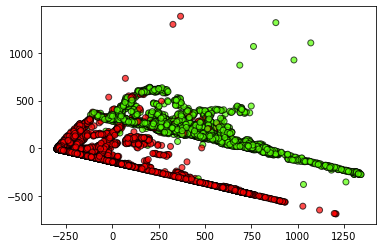

In [11]:
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_train, cmap=plt.cm.prism, edgecolor='k', alpha=0.7)
plt.show()

LINEAR SVM

In [12]:
from sklearn.svm import LinearSVC

In [13]:
clf_svm = LinearSVC(C=1.0, random_state=0)
clf_svm.fit(X_train, y_train)

y_pred_svm = clf_svm.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred_svm))
print('F1-score %s' % f1_score(y_test, y_pred_svm, average=None))
print(classification_report(y_test, y_pred_svm))

Accuracy 0.9909208819714657
F1-score [0.99406654 0.98067633]
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      4743
           1       0.96      1.00      0.98      1425

    accuracy                           0.99      6168
   macro avg       0.98      0.99      0.99      6168
weighted avg       0.99      0.99      0.99      6168



c:\users\gianmarco\anaconda3\envs\pythoncpu\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [14]:
clf_svm = LinearSVC(C=50.0, random_state=0) #cambio completamente i paramentri, ottenendo un risultato sempre minore o uguale al precedente(mai magguore).
clf_svm.fit(X_train, y_train)

y_pred_svm = clf_svm.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred_svm))
print('F1-score %s' % f1_score(y_test, y_pred_svm, average=None))
print(classification_report(y_test, y_pred_svm))

Accuracy 0.9910830090791181
F1-score [0.99417558 0.98098859]
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      4743
           1       0.97      1.00      0.98      1425

    accuracy                           0.99      6168
   macro avg       0.98      0.99      0.99      6168
weighted avg       0.99      0.99      0.99      6168



c:\users\gianmarco\anaconda3\envs\pythoncpu\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [15]:
clf_svm = LinearSVC(C=0.005, random_state=0) 
clf_svm.fit(X_train, y_train)

y_pred_svm = clf_svm.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred_svm))
print('F1-score %s' % f1_score(y_test, y_pred_svm, average=None))
print(classification_report(y_test, y_pred_svm))

Accuracy 0.9910830090791181
F1-score [0.99417558 0.98098859]
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      4743
           1       0.97      1.00      0.98      1425

    accuracy                           0.99      6168
   macro avg       0.98      0.99      0.99      6168
weighted avg       0.99      0.99      0.99      6168



c:\users\gianmarco\anaconda3\envs\pythoncpu\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [16]:
decision_function = clf_svm.decision_function(X_train)
support_vector_indices = np.where((2 * y_train - 1) * decision_function <= 1)[0]
support_vectors = X_train[support_vector_indices]

In [17]:
support_vectors_pca = pca.transform(support_vectors)

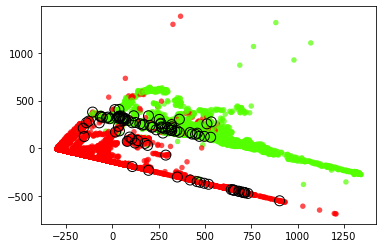

In [18]:
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_train, cmap=plt.cm.prism, edgecolor='none', alpha=0.7, s=30)
plt.scatter(support_vectors_pca[:100, 0], support_vectors_pca[:100, 1], s=100,
                linewidth=1, facecolors='none', edgecolors='k')
plt.show()

EFFECT OF C

c:\users\gianmarco\anaconda3\envs\pythoncpu\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
c:\users\gianmarco\anaconda3\envs\pythoncpu\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


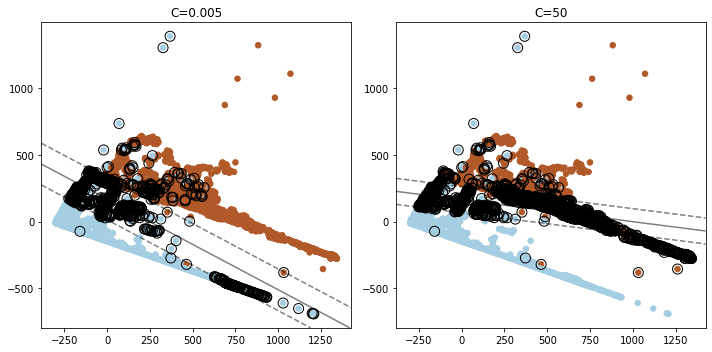

In [19]:
from sklearn.svm import LinearSVC

X=X_pca
y=y_train

plt.figure(figsize=(10, 5))
for i, C in enumerate([0.005, 50]):
    # "hinge" is the standard SVM loss
    clf = LinearSVC(C=C, loss="hinge", random_state=0).fit(X, y)
    # obtain the support vectors through the decision function
    decision_function = clf.decision_function(X)
    # we can also calculate the decision function manually
    # decision_function = np.dot(X, clf.coef_[0]) + clf.intercept_[0]
    support_vector_indices = np.where((2 * y - 1) * decision_function <= 1)[0]
    support_vectors = X[support_vector_indices]

    plt.subplot(1, 2, i + 1)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50),
                         np.linspace(ylim[0], ylim[1], 50))
    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
                linestyles=['--', '-', '--'])
    plt.scatter(support_vectors[:, 0], support_vectors[:, 1], s=100,
                linewidth=1, facecolors='none', edgecolors='k')
    plt.title("C=" + str(C))
plt.tight_layout()
plt.show()

NONLINEAR SVM

In [20]:
from sklearn.svm import SVC

In [21]:
svm_nl = SVC(gamma='scale')
svm_nl.fit(X_train, y_train)

y_pred_nl = svm_nl.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred_nl))
print('F1-score %s' % f1_score(y_test, y_pred_nl, average=None))
print(classification_report(y_test, y_pred_nl))

Accuracy 0.9904345006485085
F1-score [0.99374934 0.9796341 ]
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      4743
           1       0.96      1.00      0.98      1425

    accuracy                           0.99      6168
   macro avg       0.98      0.99      0.99      6168
weighted avg       0.99      0.99      0.99      6168



In [22]:
svm_nl = SVC(gamma='scale', C=0.1, kernel='rbf', random_state=0)
svm_nl.fit(X_train, y_train)

y_pred_nl = svm_nl.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred_nl))
print('F1-score %s' % f1_score(y_test, y_pred_nl, average=None))
print(classification_report(y_test, y_pred_nl))

Accuracy 0.9897859922178989
F1-score [0.99332273 0.97828335]
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      4743
           1       0.96      1.00      0.98      1425

    accuracy                           0.99      6168
   macro avg       0.98      0.99      0.99      6168
weighted avg       0.99      0.99      0.99      6168



In [23]:
svm_nl.support_

array([   57,    67,    76,    79,   140,   144,   153,   165,   241,
         246,   320,   340,   354,   357,   379,   409,   428,   475,
         497,   510,   657,   687,   699,   715,   792,   830,   841,
         854,   909,   921,   962,   965,   997,  1000,  1001,  1022,
        1067,  1103,  1162,  1165,  1172,  1236,  1245,  1297,  1311,
        1338,  1366,  1381,  1388,  1396,  1399,  1406,  1415,  1433,
        1436,  1464,  1470,  1481,  1489,  1503,  1537,  1546,  1552,
        1578,  1585,  1616,  1701,  1741,  1751,  1794,  1807,  1817,
        1820,  1832,  1848,  1850,  1894,  2012,  2091,  2112,  2116,
        2138,  2142,  2147,  2167,  2266,  2268,  2276,  2325,  2327,
        2330,  2382,  2406,  2413,  2420,  2421,  2486,  2511,  2524,
        2531,  2571,  2589,  2594,  2620,  2657,  2723,  2740,  2749,
        2758,  2784,  2785,  2826,  2846,  2886,  3028,  3030,  3064,
        3070,  3183,  3190,  3243,  3246,  3286,  3294,  3349,  3360,
        3373,  3378,

In [24]:
svm_nl.support_[:10]

array([ 57,  67,  76,  79, 140, 144, 153, 165, 241, 246])

In [25]:
svm_nl.n_support_, len(X_train) #num di support vector per ogni classe

(array([491, 490]), 14392)

EFFECT OF DIFFERENT KERNELS

In [27]:
svm_kerlin=SVC( C=0.005, kernel='linear', random_state=0)
svm_kerlin.fit(X_train, y_train)
y_pred_lin=svm_kerlin.predict(X_test)

svm_kerpoly=SVC( C=0.005, kernel='poly', random_state=0)
svm_kerpoly.fit(X_train, y_train)
y_pred_poly=svm_kerpoly.predict(X_test)

svm_kerrbf=SVC( C=0.005, kernel='rbf', random_state=0)
svm_kerrbf.fit(X_train, y_train)
y_pred_rbf=svm_kerrbf.predict(X_test)

In [28]:
print('Accuracy linear kernel %s' % accuracy_score(y_test, y_pred_lin))
print('F1-score linear kernel %s' % f1_score(y_test, y_pred_lin, average=None))
print(classification_report(y_test, y_pred_lin))

Accuracy linear kernel 0.9912451361867705
F1-score linear kernel [0.99428087 0.9813407 ]
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      4743
           1       0.97      1.00      0.98      1425

    accuracy                           0.99      6168
   macro avg       0.98      0.99      0.99      6168
weighted avg       0.99      0.99      0.99      6168



In [29]:
print('Accuracy polynomial kernel %s' % accuracy_score(y_test, y_pred_poly))
print('F1-score polynomial kernel %s' % f1_score(y_test, y_pred_poly, average=None))
print(classification_report(y_test, y_pred_poly))

Accuracy polynomial kernel 0.9842736705577172
F1-score polynomial kernel [0.98976253 0.96609577]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4743
           1       0.96      0.97      0.97      1425

    accuracy                           0.98      6168
   macro avg       0.98      0.98      0.98      6168
weighted avg       0.98      0.98      0.98      6168



In [30]:
print('Accuracy rbf kernel %s' % accuracy_score(y_test, y_pred_rbf))
print('F1-score rbf kernel %s' % f1_score(y_test, y_pred_rbf, average=None))
print(classification_report(y_test, y_pred_rbf))

Accuracy rbf kernel 0.9852464332036317
F1-score rbf kernel [0.99032635 0.96893138]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99      4743
           1       0.94      1.00      0.97      1425

    accuracy                           0.99      6168
   macro avg       0.97      0.99      0.98      6168
weighted avg       0.99      0.99      0.99      6168

